In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from tqdm.auto import tqdm
import pandas as pd

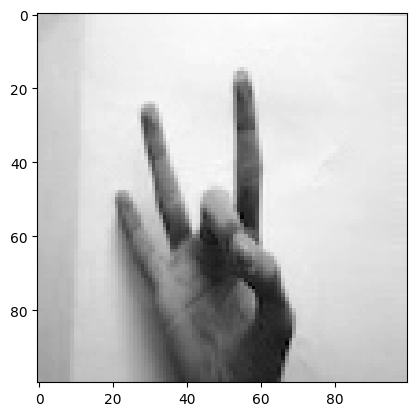

In [2]:
image = plt.imread('data/Dataset/8/IMG_1268.JPG')[:,:,2]
plt.imshow(image, cmap='gray')
plt.show()

In [3]:
def conv(image, kernel):

    img = image.copy()
    
    k_H, k_W = kernel.shape
    
    img = np.pad(img, (k_H - 1, k_W - 1), 'edge')
    
    rows, cols = image.shape

    output_image = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            # Extract the region of interest
            region = img[i:i+k_H, j:j+k_W]
            # Apply the kernel (element-wise multiplication and sum the result)
            output = np.sum(region * kernel)
            # Store the result in the output image
            output_image[i, j] = output

    # Normalize the output image to be in the range [0, 255]
    output_image = cv2.normalize(output_image, None, 0, 255, cv2.NORM_MINMAX)
    return output_image

def pooling(image, size, type = 'max'):
    # Get image dimensions
    rows, cols = image.shape

    # Define the size of the pooling window
    pool_size = size

    # Calculate the dimensions of the output image
    pooled_rows = rows // pool_size
    pooled_cols = cols // pool_size

    # Create an empty array to store the pooled result
    pooled_image = np.zeros((pooled_rows, pooled_cols), dtype=np.uint8)

    if type == 'max':
        # Apply max pooling
        for i in range(pooled_rows):
            for j in range(pooled_cols):
                # Define the region of interest
                region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
                # Get the maximum value in the region
                max_value = np.max(region)
                # Store the result in the pooled image
                pooled_image[i, j] = max_value
    elif type == 'min':
        # Apply min pooling
        for i in range(pooled_rows):
            for j in range(pooled_cols):
                # Define the region of interest
                region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
                # Get the minimum value in the region
                min_value = np.min(region)
                # Store the result in the pooled image
                pooled_image[i, j] = min_value
    return pooled_image

In [4]:
np.set_printoptions(threshold=np.inf)

In [5]:
def feature_extract(image, type=1, show=False):
    kernel1 = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])

    kernel2 = np.array([[1, 0, -1], 
                        [2, 0, -2], 
                        [1, 0, -1]])

    kernel3 = np.array([[1, 2, 1], 
                        [0,  0, 0], 
                        [-1, -2, -1]])
    
    
    kernel4 = np.array([[-1, -2, -1], 
                        [0,  0, 0], 
                        [1, 2, 1]])

    if type == 1:
        kernel = kernel1
    elif type == 2:
        kernel = kernel2
    elif type == 3:
        kernel = kernel3
    elif type == 4:
        kernel = kernel4

    output = []

    out = image.copy()
    output.append(out)

    out = conv(out, kernel)
    output.append(out)

    # out = conv(out, kernel)
    # output.append(out)

    out = pooling(out, 2, "max")
    output.append(out)

    out = pooling(out, 2, "max")
    output.append(out)

    if show:
        fig, ax = plt.subplots(1, len(output), figsize=(15, 15 * len(output)))
        fig.tight_layout()
        for ax, img in zip(ax, output):
            ax.imshow(img, cmap="gray")
            ax.title.set_text(img.shape)
        plt.show()

    return out

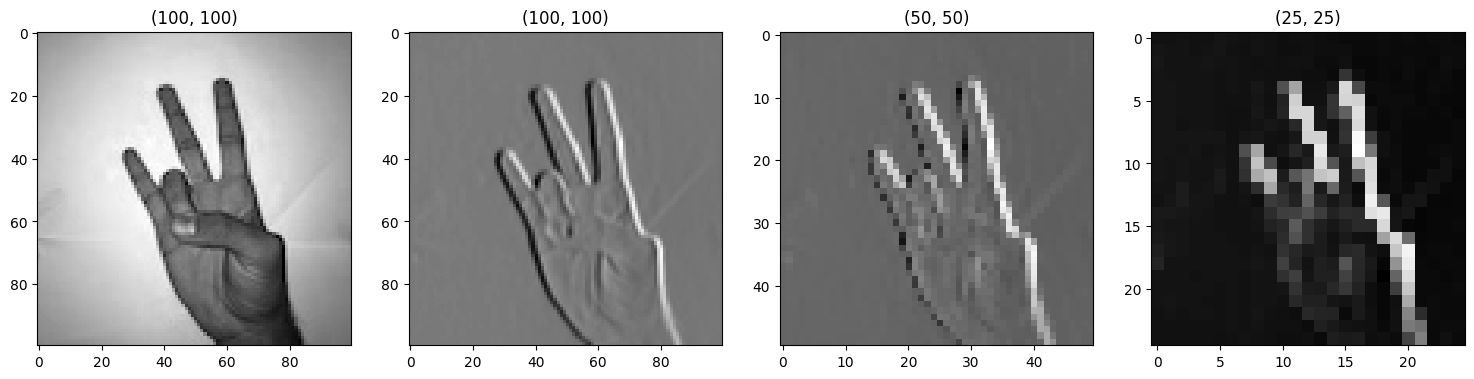

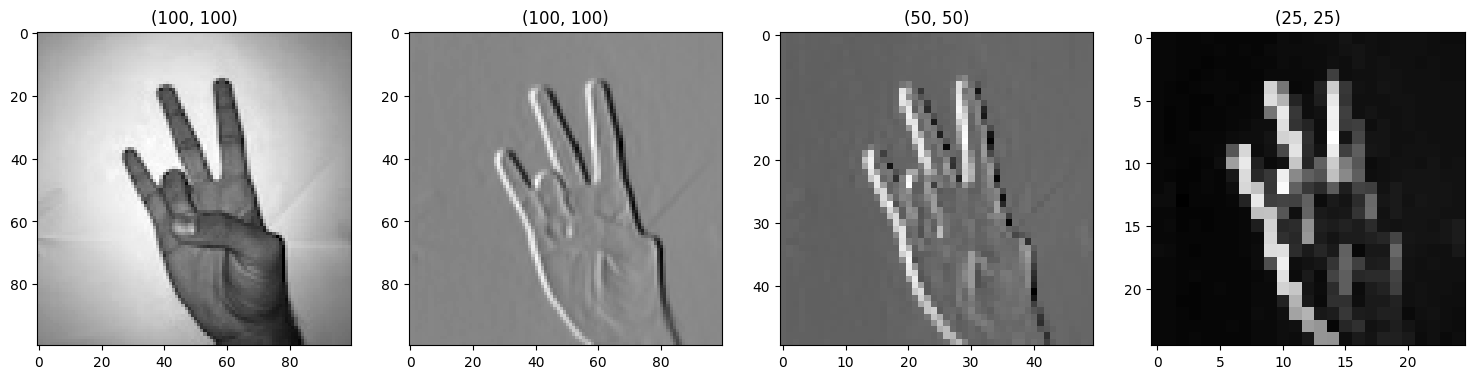

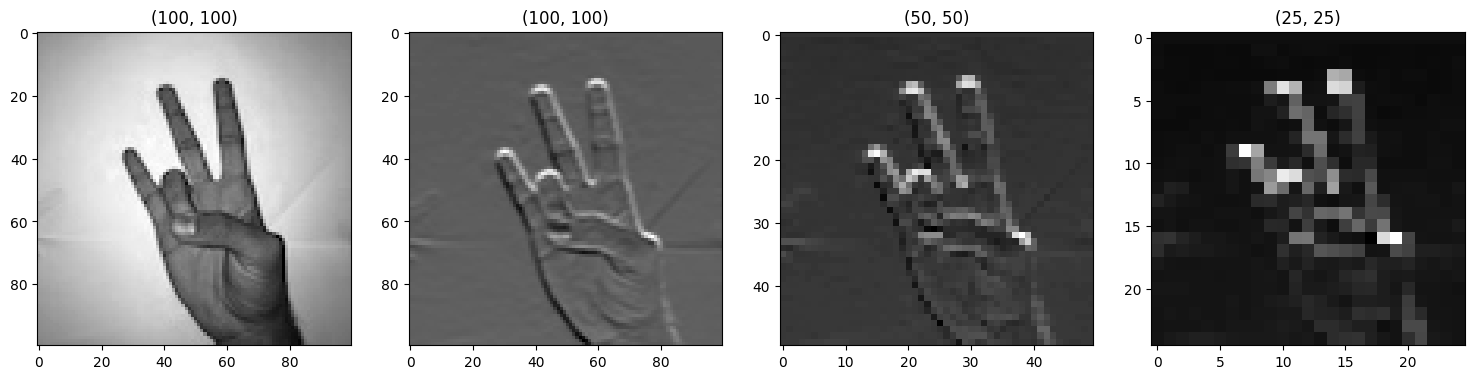

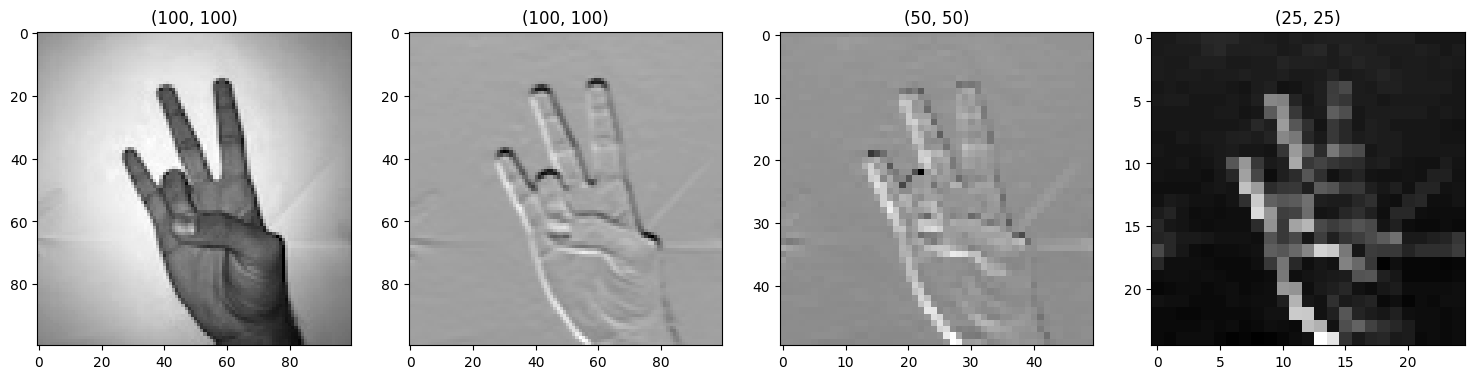

In [6]:
image = plt.imread('data/Dataset/7/IMG_4126.JPG')[:,:,2]
image = np.array(image, dtype=np.uint8)
# image = cv2.Canny(image=image, threshold1=200, threshold2=300)


img = feature_extract(image, 1, True)
img = feature_extract(image, 2, True)
img = feature_extract(image, 3, True)
img = feature_extract(image, 4, True)

In [6]:
def fusion_features(image):
    fusion_feature = np.array([])
    for i in range(1, 5):
        feature = feature_extract(image, i)
        feature = feature.flatten()
        
        fusion_feature = np.concatenate([fusion_feature, feature])
    
    # Normalize
    fusion_feature = (fusion_feature - fusion_feature.min()) / (fusion_feature.max() - fusion_feature.min()) 
    return np.array(fusion_feature)

In [7]:
image = plt.imread('data/Dataset/7/IMG_4126.JPG')[:,:,2]
fusioatures = fusion_features(image)
fusioatures

array([0.23121387, 0.23121387, 0.23699422, 0.23121387, 0.23121387,
       0.24277457, 0.23699422, 0.23121387, 0.23699422, 0.23121387,
       0.21965318, 0.22543353, 0.22543353, 0.21965318, 0.21387283,
       0.20809249, 0.20809249, 0.20809249, 0.21387283, 0.20809249,
       0.21387283, 0.20809249, 0.21387283, 0.21387283, 0.20809249,
       0.24277457, 0.23699422, 0.23699422, 0.23121387, 0.23699422,
       0.24277457, 0.23121387, 0.22543353, 0.23699422, 0.23121387,
       0.21965318, 0.21965318, 0.22543353, 0.21965318, 0.21965318,
       0.21965318, 0.20809249, 0.20809249, 0.21387283, 0.20809249,
       0.20809249, 0.20809249, 0.20809249, 0.21387283, 0.21387283,
       0.24855491, 0.23699422, 0.23699422, 0.23699422, 0.24277457,
       0.23699422, 0.23699422, 0.23121387, 0.22543353, 0.23121387,
       0.22543353, 0.23121387, 0.23121387, 0.21387283, 0.21387283,
       0.22543353, 0.20231214, 0.20231214, 0.20809249, 0.20809249,
       0.21387283, 0.20809249, 0.20231214, 0.21965318, 0.21387

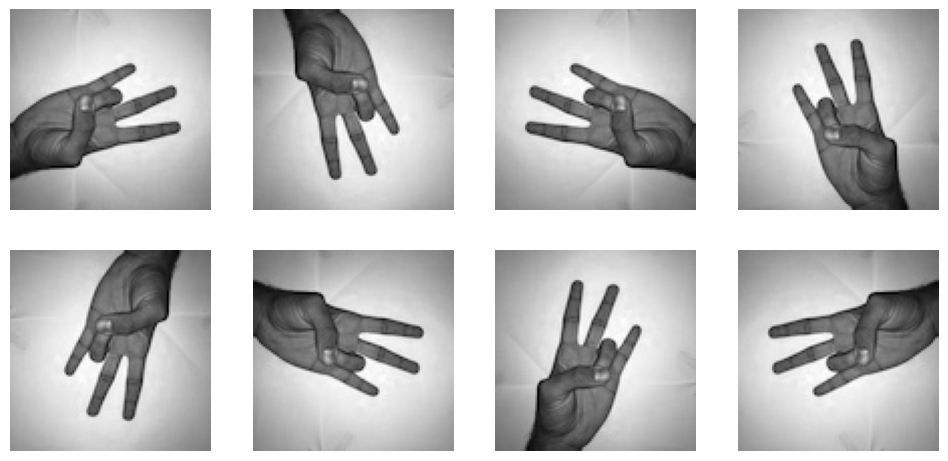

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample image (replace this with your actual image)
image = plt.imread('data/Dataset/7/IMG_4126.JPG')[:,:,2]

# List of rotations
rotations = [-3, -2, -1, 0, 1, 2, 3]

# Function to apply transformations without overlaps
def augment_image(image, rotations):
    augmented_images = set()
    
    for k in rotations:
        rotated = np.rot90(image, k)
        augmented_images.add(tuple(map(tuple, rotated)))
        augmented_images.add(tuple(map(tuple, np.flipud(rotated))))
        augmented_images.add(tuple(map(tuple, np.fliplr(rotated))))
        augmented_images.add(tuple(map(tuple, np.flipud(np.fliplr(rotated)))))
    
    return [np.array(img) for img in augmented_images]

# Generate all unique combinations
augmented_images = augment_image(image, rotations)

# Display the augmented images
plt.figure(figsize=(12, 12))
for i, img in enumerate(augmented_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


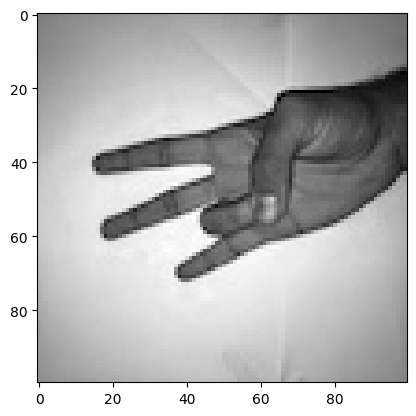

In [9]:
def augment_image(image, seed):
    if seed is None:
        seed = np.random.randint(0, 8)

    if seed == 0:
        return image
    elif seed == 1:
        return np.rot90(image, 1)
    elif seed == 2:
        return np.rot90(image, 2)
    elif seed == 3:
        return np.rot90(image, 3)
    elif seed == 4:
        return np.flipud(image)
    elif seed == 5:
        return np.fliplr(image)
    elif seed == 6:
        return np.flipud(np.rot90(image, 1))
    elif seed == 7:
        return np.fliplr(np.rot90(image, 1))
    
plt.imshow(augment_image(image, 1), cmap='gray')

In [ ]:
import pickle
from tqdm.notebook import tqdm
features_len = 2500
features_map = {0:np.zeros(features_len), 1:np.zeros(features_len), 2:np.zeros(features_len), 3:np.zeros(features_len), 4:np.zeros(features_len), 5:np.zeros(features_len), 6:np.zeros(features_len), 7:np.zeros(features_len), 8:np.zeros(features_len), 9:np.zeros(features_len)}

count = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

train_df = pd.read_csv('data/train_data.csv')

n = len(train_df)

for idx in tqdm(range(n)):
    image_path = 'data/' + train_df['File name'][idx][38:]
    label = int(train_df['Label'][idx])
    image = plt.imread(image_path)[:,:,2]
    
    count[label] += 8
    for i in range(8):
        augmented_image = augment_image(image, i)
        fusion_feature = fusion_features(augmented_image)
    
    # combine features
        features_map[label] += fusion_feature

for i in range(10):
    features_map[i] /= count[i]
    
with open('features_map.pkl', 'wb') as f:
    pickle.dump(features_map, f)

In [4]:
def cosine_similarity(a, b):
    return (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def predict(fusion_feature):
    features_map = pickle.load(open('features_map_2.pkl', 'rb'))

    # calc cosine similarity
    cos_sim_map = np.zeros(10)
    euc_dis_map = np.zeros(10)

    for i in range(10):
        euc_dis = euclidean_distance(features_map[i], fusion_feature)
        cos_sim = cosine_similarity(features_map[i], fusion_feature)

        euc_dis_map[i] = euc_dis
        cos_sim_map[i] = cos_sim

    return cos_sim_map, euc_dis_map

In [24]:
accuracy_cos_sim = 0
accuracy_euc_dis = 0

test_df = pd.read_csv('data/test_data.csv' )
n = len(test_df)
test_features = pickle.load(open('test_features_2.pkl', 'rb'))
# n = 5

cos_sim_list = []
euc_dis_list = []
gt_list = test_df['Label']

for idx in tqdm(range(n)):
    image_path = test_df['File name'][idx]
    label = int(test_df['Label'][idx])
    # image = plt.imread(image_path)[:,:,2]

    name = image_path[image_path.find('/Dataset')+1:]
    feature = test_features[name]

    seed = np.random.randint(0, 8)
    # augmented_image = augment_image(image, seed)
    # fusion_feature = fusion_features(augmented_image)

    fusion_feature = feature[seed]

    cos_sim_map, euc_dis_map = predict(fusion_feature)
    
    cos_sim_list.append(np.argmax(cos_sim_map))
    euc_dis_list.append(np.argmin(euc_dis_map))
    
    accuracy_cos_sim += np.argmax(cos_sim_map) == label
    accuracy_euc_dis += np.argmin(euc_dis_map) == label

    # print(accuracy_cos_sim, accuracy_euc_dis)

print('Accuracy with cosine similarity: ', 100* accuracy_cos_sim / len(test_df))
print('Accuracy with euclidean distance: ', 100* accuracy_euc_dis /len(test_df))

  0%|          | 0/417 [00:00<?, ?it/s]

Accuracy with cosine similarity:  50.35971223021583
Accuracy with euclidean distance:  38.36930455635492


In [104]:
from sklearn import metrics
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(gt_list, euc_dis_list)

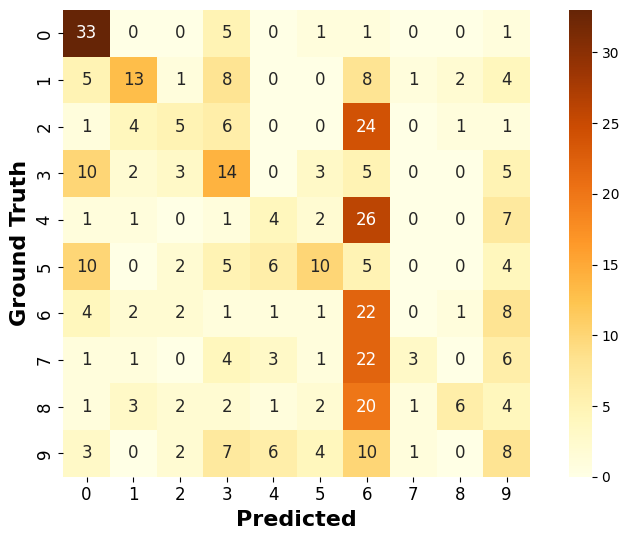

In [119]:
ax = plt.subplots(figsize=(8, 5.5))[1]
sns.heatmap(
    confusion_matrix,
    cmap="YlOrBr",
    annot=True,
    square=True,
    linecolor="black",
    # linewidths=0.75,
    ax=ax,
    annot_kws={"size": 12},
)

ax.set_xlabel("Predicted", fontsize=16, fontweight="bold")
ax.xaxis.set_label_position("bottom")
ax.yaxis.set_ticklabels(
    np.arange(10), fontsize=12, 
)
ax.xaxis.set_ticklabels(
    np.arange(10), fontsize=12
)
ax.set_ylabel("Ground Truth", fontsize=16, fontweight="bold")
plt.tight_layout()